# Data Scaling : Standard, Min-Max, Robust

In [126]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#iris_df = load_iris()

In [127]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

<function RandomState.normal>

# sklearn.preprocessing.StandardScaler
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)
* 쉽게 얘기하면 평균이 0이고 분산이 1인 정규분포 형태로 변환하는 겁니다

In [128]:
# Standard Scaler

scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1','x2'])
standard_df

,x1,x2
0,0.280022,0.282585
1,-0.075961,-0.056245
2,0.256181,-0.463839
3,-0.137215,-0.831177
4,0.412535,0.821984
...,...,...
1020,-5.092936,5.689690
1021,-4.635344,6.029537
1022,-5.401597,5.553924
1023,-5.536306,5.491633


# sklearn.preprocessing.MinMaxScaler
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler
* class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
* 데이터 값을 0 ~ 1 사이 값으로 변환 (음수가 있으면 -1 ~ 1)

In [129]:
# Min-Max Scaler

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1','x2'])
minmax_df

,x1,x2
0,0.810866,0.293175
1,0.770548,0.253500
2,0.808166,0.205773
3,0.763610,0.162760
4,0.825875,0.356335
...,...,...
1020,0.202326,0.926316
1021,0.254153,0.966110
1022,0.167367,0.910419
1023,0.152110,0.903125


# sklearn.preprossing.RobustScaler
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robust#sklearn.preprocessing.RobustScaler
* class sklearn.preprocessing.RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
* 데이터를 1사분위, 2사분위, 3사분위, 4사분위로 쪼개서 평균과 분산 대신 중간값과 사분위값을 사용하는 방법
* https://wikidocs.net/89704
* 이래도 이게 뭔가 싶으면 boxplot 사촌이라고 생각하세요

In [130]:
# Robust Scaler

scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])
robust_df

,x1,x2
0,0.202141,0.506567
1,-0.263732,0.061388
2,0.170941,-0.474137
3,-0.343896,-0.956770
4,0.375562,1.215265
...,...,...
1020,-6.829439,7.610787
1021,-6.230590,8.057301
1022,-7.233383,7.432409
1023,-7.409677,7.350566


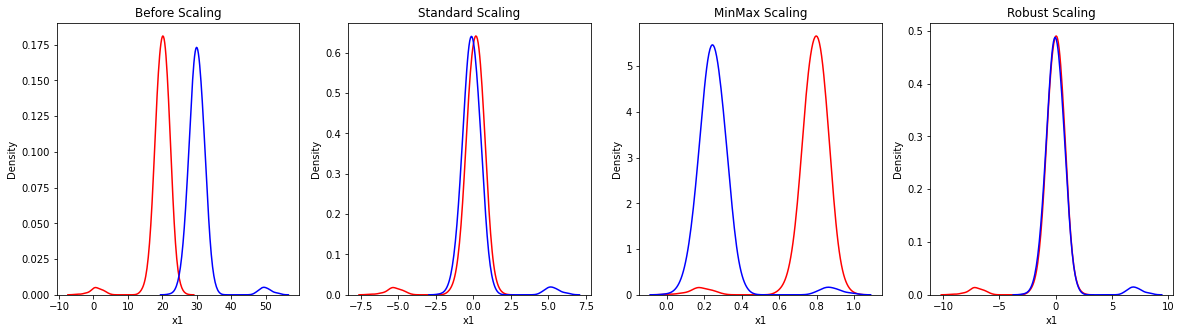

In [131]:
# Draw Graph

fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color='r')
sns.kdeplot(x['x2'], ax=ax1, color='b')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'], ax=ax2, color='r')
sns.kdeplot(standard_df['x2'], ax=ax2, color='b')

ax3.set_title("MinMax Scaling")
sns.kdeplot(minmax_df['x1'], ax=ax3, color='r')
sns.kdeplot(minmax_df['x2'], ax=ax3, color='b')

ax4.set_title("Robust Scaling")
sns.kdeplot(robust_df['x1'], ax=ax4, color='r')
sns.kdeplot(robust_df['x2'], ax=ax4, color='b')


plt.show()